In [1]:
# импорт бибилиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Визуализация зависимостей данных

In [2]:
df = pd.read_csv('C1_result.csv')
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,year,month,day,hour,category_travel_time
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,17,2.0
1,1,2016-03-14 14:05:39,1,-73.975090,40.758766,-73.953201,40.765068,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,14,4.0
2,1,2016-03-14 15:04:38,1,-73.994484,40.745087,-73.998993,40.722710,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,15,3.0
3,2,2016-03-14 04:24:36,3,-73.944359,40.714489,-73.910530,40.709492,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,4,3.0
4,2,2016-03-14 14:57:56,1,-73.952881,40.766468,-73.978630,40.761921,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,15,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964658 entries, 0 to 964657
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             964658 non-null  int64  
 1   pickup_datetime       964658 non-null  object 
 2   passenger_count       964658 non-null  int64  
 3   pickup_longitude      964658 non-null  float64
 4   pickup_latitude       964658 non-null  float64
 5   dropoff_longitude     964658 non-null  float64
 6   dropoff_latitude      964658 non-null  float64
 7   store_and_fwd_flag    964658 non-null  int64  
 8   maximum temperature   964658 non-null  float64
 9   minimum temperature   964658 non-null  float64
 10  average temperature   964658 non-null  float64
 11  precipitation         964658 non-null  float64
 12  snow fall             964658 non-null  float64
 13  snow depth            964658 non-null  float64
 14  year                  964658 non-null  int64  
 15  

Преобразуем тип данных столбца category_travel_time для дальнейшего обучения модели/

In [4]:
df['category_travel_time'] = df['category_travel_time'].astype('category')

## Корреляция

<AxesSubplot:>

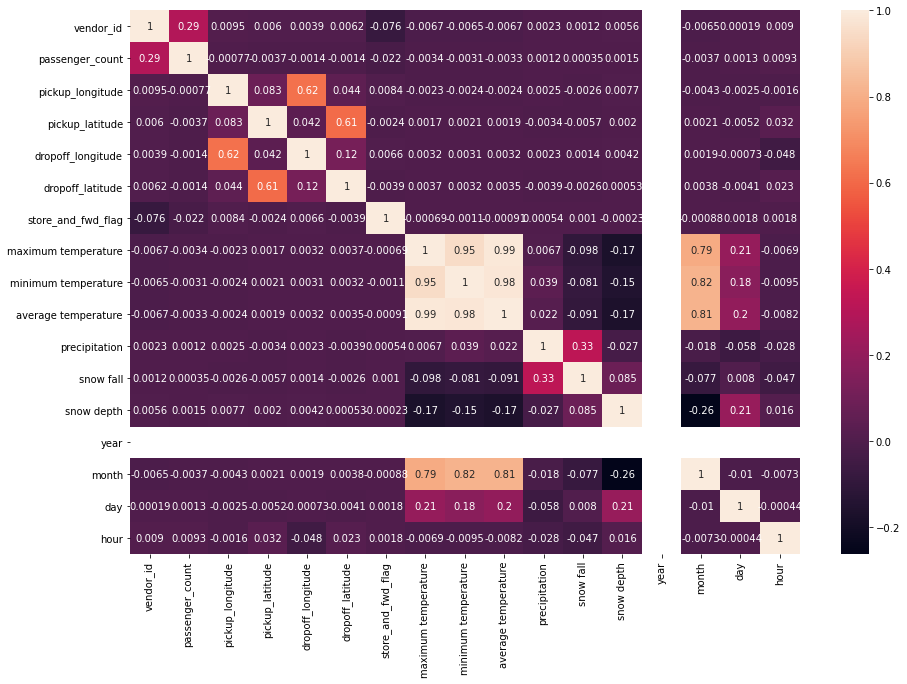

In [5]:
#  тепловая матрица корреляции
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True)

Удаление колинеарных признаков

In [6]:
df.drop(['maximum temperature','minimum temperature'], axis=1, inplace=True)

## Графики зависимостей аттрибутов на целевую переменную

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

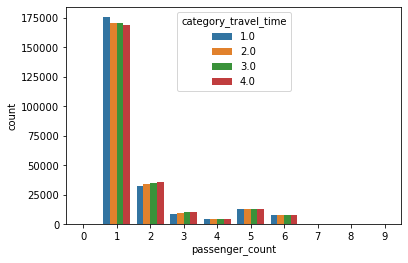

In [32]:
sns.countplot(x='passenger_count', data = df, hue = 'category_travel_time')

In [8]:
#ещё график
#%config InlineBackend.figure_format = 'png'
#sns.pairplot(df, hue="category_travel_time")

# Разбиение набора данных

In [9]:
df = df.drop(['pickup_datetime', 'pickup_latitude','pickup_longitude', 'dropoff_longitude','dropoff_latitude'], axis = 1)

In [10]:
X = df.drop(['category_travel_time'], axis = 1)
y = df['category_travel_time']

In [11]:
from sklearn.model_selection import train_test_split

Разделим данные на тестовые и обучающую выборки, в соотношении 80 на 20, так как это самый популярный метод деления.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Классификация исходных компетенций

Были выбраны 3 метода, такие как: Логистическая Регрессия, k Ближайших Соседей и множество деревьев. Эти методы были выбраны, так как они относятся к числу распространенных методов решения задачи классификации.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [14]:
lr = LogisticRegression()

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
rfc = RandomForestClassifier()

# Обучение моделей

Обучим выбранные модели, затем оценим их качество и выберем лучшую.

In [17]:
%%time
lr.fit(X_train, y_train)

Wall time: 7.01 s


LogisticRegression()

In [18]:
%%time
knn.fit(X_train, y_train)

Wall time: 1min 45s


KNeighborsClassifier()

In [19]:
%%time
rfc.fit(X_train, y_train)

Wall time: 1min 15s


RandomForestClassifier()

Прогнозирование

In [20]:
lr_pred = lr.predict(X_test)

In [21]:
knn_pred = knn.predict(X_test)

In [22]:
rfc_pred = rfc.predict(X_test)

# Оценка качества моделей

Для оценки качества модели выберем метрики: аккуратность и отчёт классификации

In [23]:
#загрузка метрик
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Отчёт о классификации

In [24]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         1.0       0.27      0.41      0.33     48540
         2.0       0.25      0.10      0.14     48052
         3.0       0.26      0.15      0.19     48497
         4.0       0.27      0.40      0.32     47843

    accuracy                           0.26    192932
   macro avg       0.26      0.26      0.24    192932
weighted avg       0.26      0.26      0.24    192932



In [25]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         1.0       0.27      0.37      0.31     48540
         2.0       0.25      0.27      0.26     48052
         3.0       0.25      0.23      0.24     48497
         4.0       0.28      0.19      0.22     47843

    accuracy                           0.26    192932
   macro avg       0.26      0.26      0.26    192932
weighted avg       0.26      0.26      0.26    192932



In [26]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         1.0       0.29      0.29      0.29     48540
         2.0       0.25      0.23      0.24     48052
         3.0       0.25      0.24      0.25     48497
         4.0       0.29      0.33      0.31     47843

    accuracy                           0.27    192932
   macro avg       0.27      0.27      0.27    192932
weighted avg       0.27      0.27      0.27    192932



Две модели показали одниаковую точность, поэтому оценим точность отдельно

In [27]:
print(accuracy_score(lr_pred, y_test))

0.2647461281695105


In [28]:
print(accuracy_score(knn_pred, y_test))

0.2622478386167147


In [29]:
print(accuracy_score(rfc_pred, y_test))

0.27282151224265544


Наилучшее качество показала модель RandomForestClassifier